# Photomosaic Generator

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

%matplotlib inline

In [31]:
img1 = cv.imread('../test/0030-20e3.png')

cv.imshow('img', img1)
cv.waitKey(1000)
cv.destroyWindow('img')

In [32]:
img2 = cv.imread('../test/39-20e3.png')

cv.imshow('img', img2)
cv.waitKey(1000)
cv.destroyWindow('img')

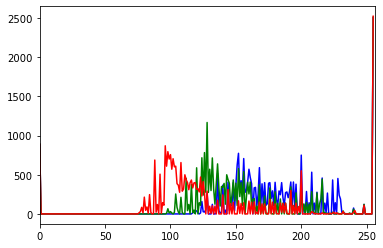

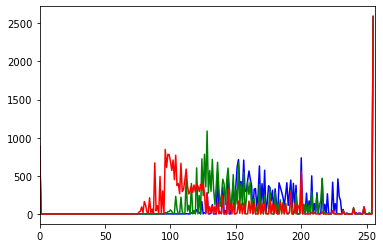

In [93]:
for img in img1, img2:
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.show()

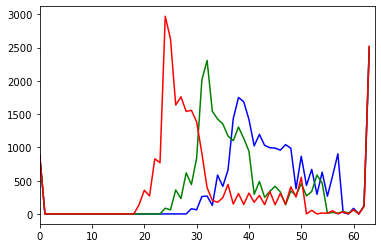

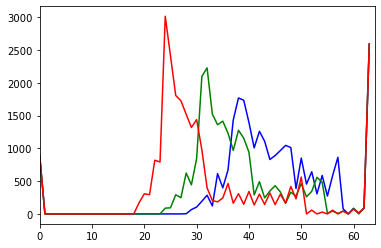

In [97]:
for img in img1, img2:
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv.calcHist([img],[i],None,[64],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,64])
    plt.show()

In [48]:
hist1 = cv.calcHist([img1], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
cv.normalize(hist1, hist1, 0, 1, cv.NORM_MINMAX)

hist2 = cv.calcHist([img2], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
cv.normalize(hist2, hist2, 0, 1, cv.NORM_MINMAX)

cv.compareHist(hist1, hist2, cv.HISTCMP_CORREL)

0.9812199442604614

In [32]:
def calc_hist(img):
    # 256*256*256 == 16MiB
    # 64*64*64 == 256KiB
    # 32*32*32 == 32KiB
    hist = cv.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    cv.normalize(hist, hist, 0, 1, cv.NORM_MINMAX)
    return hist

## Merge

In [121]:
import os

In [3]:
#dir = r'C:\Home\...'
dir = r'C:\Temp\test'
images = []
for name in os.listdir(dir):
    images.append(os.path.join(dir, name))
images = images[:100]

In [114]:
image = cv.imread(f'../test/1f601.png', cv.IMREAD_COLOR)
images = [cv.imread(f'../test/{file}', cv.IMREAD_COLOR) for file in [
    '0030-20e3.png', '39-20e3.png', '24c2.png', '25fc.png', '267f.png', '1f636.png', '2b1c.png', '1f590-1f3fe.png', '1f570.png', '1f9d1-1f3fe.png'
]]
resized_images = [None] * len(images)
hists = [calc_hist(img) for img in images]

In [33]:
resized_images = [None] * len(images)

hists = []
for i, img in enumerate(images):
    #print(i)
    hists.append(calc_hist(cv.imread(img)))

#hists = [calc_hist(cv.imread(img)) for img in images]

In [4]:
image = cv.imread(r'C:\Temp\test\a.png')

In [155]:
cv.imshow('img', image)
cv.waitKey(0)
cv.destroyAllWindows()

In [42]:
img = image.copy()

x_n, y_n = 120, 160
x_step, y_step = img.shape[1] // x_n, img.shape[0] // y_n
resized_images = [None] * len(images)
print(y_step, x_step)
for x in range(0, img.shape[1], x_step):
    print(x)
    for y in range(0, img.shape[0], y_step):
        #print(x, y)

        x_end, y_end = min(x + x_step, img.shape[1]), min(y + y_step, img.shape[0])
        x_size, y_size = x_end - x, y_end - y

        base = calc_hist(img[y:y_end, x:x_end])

        max_i = 0
        max_sim = 0
        for i, hist in enumerate(hists):
            sim = cv.compareHist(base, hist, cv.HISTCMP_CORREL)
            if sim > max_sim:
                max_i = i
                max_sim = sim
        if resized_images[max_i] is None:
            resized_images[max_i] = cv.resize(cv.imread(images[max_i], cv.IMREAD_COLOR), (x_step, y_step))
        img[y:y_end, x:x_end] = resized_images[max_i][:y_size, :x_size]


cv.imshow('img', img)
cv.waitKey(0)
cv.destroyAllWindows()

# HISTCMP_CORREL >40s
# HISTCMP_CHISQR >40s
# HISTCMP_INTERSECT 20s

5 5
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670


1. 载入缩小图
2. 读取暂存池

进度报告